<a href="https://colab.research.google.com/github/DennisCeballos/PruebaRegresionLogistica/blob/main/Actividad%20Regresion%20Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicción de Abandono de Estudiantes en un Curso en Línea
Dennis Andre Ceballos Manrique

> Contexto: Una plataforma de educación en línea quiere predecir si un estudiante abandonará un curso antes de completarlo. La plataforma tiene acceso a datos históricos que incluyen **la cantidad de horas** que el estudiante dedica semanalmente al curso, el **número de evaluaciones completadas**, las **calificaciones obtenidas en los primeros exámenes**, y la **participación en foros de discusión**.

Decision de preprocesamiento:
Dado que las variables con las que se tratan son, en pocas palabras, resultados del rendimiento de estudiantes, entonces se trata de que cada variable sea manejada como porcentaje. Por ende, se debe aplicar NORMALIZACION a los datos.

## Generación del Modelo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tabulate import tabulate #solo para la interpretacino de coeficientes

# Simular algunos datos
np.random.seed(0)
n_samples = 500
data = pd.DataFrame({
    'hours_per_week': np.random.normal(10, 2, n_samples),
    'evaluations_completed': np.random.randint(1, 5, n_samples),
    'exam_scores': np.random.randint(50, 100, n_samples),
    'forum_participation': np.random.randint(0, 10, n_samples),
    'dropped_out': np.random.choice([0, 1], n_samples)  # 1 indica abandono
})

print("Data SIN procesamiento")
print(data.head())

# Pre-procesamiento de data
# Para este ejemplo, no fue necesario preparar una limpieza de estos tipos
# scaler_standard = StandardScaler()
# df = df.dropna()
# df = df.fillna(0)
scaler_normal = MinMaxScaler()

data['hours_per_week_prepro'] = scaler_normal.fit_transform(data[['hours_per_week']])
data['evaluations_completed_prepro'] = scaler_normal.fit_transform(data[['evaluations_completed']])
data['exam_scores_prepro'] = data['exam_scores']/100.0
data['forum_participation_prepro'] = scaler_normal.fit_transform(data[['forum_participation']])

print("\n -- Data CON PRE-PROCESAMIENTO")
print(data.head())

# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = data[['hours_per_week_prepro', 'evaluations_completed_prepro', 'exam_scores_prepro', 'forum_participation_prepro']]
y = data['dropped_out']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

Data SIN procesamiento
   hours_per_week  evaluations_completed  exam_scores  forum_participation  \
0       13.528105                      3           77                    1   
1       10.800314                      4           54                    7   
2       11.957476                      4           72                    0   
3       14.481786                      2           87                    2   
4       13.735116                      4           85                    9   

   dropped_out  
0            0  
1            0  
2            0  
3            0  
4            1  

 -- Data CON PRE-PROCESAMIENTO
   hours_per_week  evaluations_completed  exam_scores  forum_participation  \
0       13.528105                      3           77                    1   
1       10.800314                      4           54                    7   
2       11.957476                      4           72                    0   
3       14.481786                      2           87         

LogisticRegression()

## Evaluacion del Modelo

Matriz de confusión:


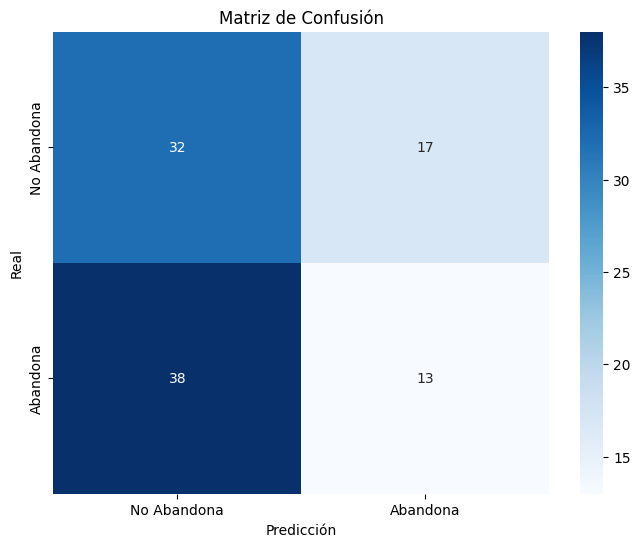

[[32 17]
 [38 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.46      0.65      0.54        49
           1       0.43      0.25      0.32        51

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.43       100
weighted avg       0.45      0.45      0.43       100



In [ ]:
# Predecir los resultados sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo

# Visualizar la matriz de confusión con seaborn
print("Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Abandona', 'Abandona'], yticklabels=['No Abandona', 'Abandona'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

### Interpretación de resultados:
**Matriz de Confusión**
* Precision.- Porcentaje de predicciones de abandono correctas sobre el total de abandono.
* Exhausitivad (Recall).- Porcentaje de abandonos correctamente predichos sobre el total de estudiantes que abandonaron.
* Puntaje F1 .- Combinación de precisión y exhaustividad en un solo número.
* "Support" .- Los datos reales de los resultados.

**Coeficientes del Modelo**

In [ ]:
# Obtener los coeficientes y el intercepto desde el modelo
coefficients = model.coef_[0]  # Coefficients for the features
intercept = model.intercept_[0]  # Intercept (bias term)

# Imprimir los coeficientes y el intercepto
print("Intercept (bias term):", intercept)
print("Coefficients for each feature:", coefficients)

# Impresion mas ordenada de los datos
datos = []
for feature, coef in zip(X.columns, coefficients):
    datos.append([feature,coef])
    #print(f"Feature: {feature}, Coefficient: \t{coef}")

print(tabulate(datos, headers=["Feature", "Cuefficient"], tablefmt="grid"))

Intercept (bias term): -0.7692183563472353
Coefficients for each feature: [ 0.60988553 -0.07049571  0.67336892 -0.13870337]
+------------------------------+---------------+
| Feature                      |   Cuefficient |
+==============================+===============+
| hours_per_week_prepro        |     0.609886  |
+------------------------------+---------------+
| evaluations_completed_prepro |    -0.0704957 |
+------------------------------+---------------+
| exam_scores_prepro           |     0.673369  |
+------------------------------+---------------+
| forum_participation_prepro   |    -0.138703  |
+------------------------------+---------------+


* Coeficientes **positivos** indican comportamiento directamente proporcional respecto a la variable resultado positivo (salir del curso en este caso)
* Coeficientes **negativos** indican comportamiento inversamente proporcional respecto a la variable resultado positivo

## Predicción de Abandono

In [ ]:
def hacer_prediccion(modelo, datos_nuevos):
    # Asegurarse de que los datos ingresados tengan la misma forma que los datos de entrenamiento
    datos_df = pd.DataFrame([datos_nuevos], columns=['hours_per_week_prepro', 'evaluations_completed_prepro', 'exam_scores_prepro', 'forum_participation_prepro'])

    '''
    # OJO, "no se puede" Normalizar los datos ingresados
    scaler_normal = MinMaxScaler()
    datos_df['hours_per_week_prepro'] = scaler_normal.fit_transform(datos_df[['hours_per_week']])
    datos_df['evaluations_completed_prepro'] = scaler_normal.fit_transform(datos_df[['evaluations_completed']])
    datos_df['exam_scores_prepro'] = datos_df['exam_scores']/100.0
    datos_df['forum_participation_prepro'] = scaler_normal.fit_transform(datos_df[['forum_participation']])
    datos_df = datos_df.drop(columns=['hours_per_week', 'evaluations_completed', 'exam_scores', 'forum_participation'])
    '''

    # Realizar la predicción
    prediccion = modelo.predict(datos_df)

    # Mostrar el resultado
    if prediccion[0] == 1:
        print("El estudiante abandonará el curso.")
    else:
        print("El estudiante completará el curso.")

# Ejemplo de predicción con nuevos datos
# datos que DEBEN ESTAR Normalizados (Es decir, para este caso, encontrarse de 0 a 1)
nuevo_estudiante = {
    'hours_per_week_prepro': 0.8,  # porcentaje de horas dedicadas semanalmente
    'evaluations_completed_prepro': 0.3,  # porcentaje de evaluaciones completadas
    'exam_scores_prepro': 0.75,  # nota promedio de las primeras calificaciones obtenidas
    'forum_participation_prepro': 0.5  # porcentaje de participación en foros
}

hacer_prediccion(model, nuevo_estudiante)


El estudiante abandonará el curso.


# Prueba de Predicción en escenario Real
Dataset usado
https://www.kaggle.com/datasets/rabieelkharoua/predict-online-course-engagement-dataset



In [ ]:
import joblib
df = pd.read_csv('online_course_engagement_data.csv')

print("Data SIN procesamiento")
print(df.head())

#Eliminacion de columnas innecesarias
df = df.drop(columns=['CourseCategory','DeviceType', 'UserID'])
print(df.head())
print(df.columns)

# Pre-procesamiento de data
df = df.dropna()
# df = df.fillna(0)
scaler_standard = StandardScaler()
scaler_normal = MinMaxScaler()

# Estandarizacion de TimeSpentOnCourse, NumberOfVideosWatched y NumberOfQuizzesTaken
#features_to_standardize = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken']
#df_standard = scaler_standard.fit_transform(df[features_to_standardize])

#df[['TimeSpentOnCourse_prepro', 'NumberOfVideosWatched_prepro', 'NumberOfQuizzesTaken_prepro']] = df_standard #Transportar dicha estandarizacion al dataframe original

# Guardar el scaler standar para usarlo luego
joblib.dump(scaler_standard, 'scaler_standard.pkl')

# Normalizacion de QuizScores y CompletionRate
df[['QuizScores_prepro', 'CompletionRate_prepro', 'TimeSpentOnCourse_prepro', 'NumberOfVideosWatched_prepro', 'NumberOfQuizzesTaken_prepro']] = scaler_normal.fit_transform(df[['QuizScores', 'CompletionRate', 'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken']])

# Guardar el scaler normal para usarlo luego
joblib.dump(scaler_normal, 'scaler_normal.pkl')

print("\n -- Data CON PRE-PROCESAMIENTO")
print(df.head())

# Dividir los datos en variables independientes (X) y la variable dependiente (y)
X = df[['TimeSpentOnCourse_prepro', 'NumberOfVideosWatched_prepro', 'NumberOfQuizzesTaken_prepro', 'QuizScores_prepro', 'CompletionRate_prepro']]
y = df['CourseCompletion']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Crear y entrenar el modelo de regresión logística
modelReal = LogisticRegression()
modelReal.fit(X_train, y_train)

Data SIN procesamiento
   UserID CourseCategory  TimeSpentOnCourse  NumberOfVideosWatched  \
0    5618         Health          29.979719                     17   
1    4326           Arts          27.802640                      1   
2    5849           Arts          86.820485                     14   
3    4992        Science          35.038427                     17   
4    3866    Programming          92.490647                     16   

   NumberOfQuizzesTaken  QuizScores  CompletionRate  DeviceType  \
0                     3   50.365656       20.860773           1   
1                     5   62.615970       65.632415           1   
2                     2   78.458962       63.812007           1   
3                    10   59.198853       95.433162           0   
4                     0   98.428285       18.102478           0   

   CourseCompletion  
0                 0  
1                 0  
2                 1  
3                 1  
4                 0  
   TimeSpentOnCourse 

LogisticRegression()

Matriz de confusión:


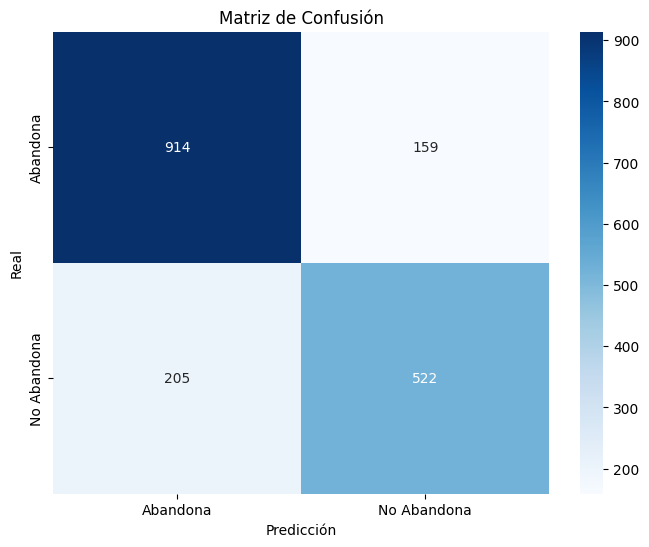

[[914 159]
 [205 522]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1073
           1       0.77      0.72      0.74       727

    accuracy                           0.80      1800
   macro avg       0.79      0.78      0.79      1800
weighted avg       0.80      0.80      0.80      1800



In [ ]:
# Predecir los resultados sobre el conjunto de prueba
y_pred = modelReal.predict(X_test)

# Evaluar el modelo

# Visualizar la matriz de confusión con seaborn
print("Matriz de confusión:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Abandona', 'No Abandona'], yticklabels=['Abandona', 'No Abandona'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

In [ ]:
# Obtener los coeficientes y el intercepto desde el modelo
coefficients = modelReal.coef_[0]  # Coefficients for the features
intercept = modelReal.intercept_[0]  # Intercept (bias term)

# Imprimir los coeficientes y el intercepto
print("Intercept (bias term):", intercept)
print("Coefficients for each feature:", coefficients)

# Impresion mas ordenada de los datos
datos = []
for feature, coef in zip(X.columns, coefficients):
    datos.append([feature,coef])
    #print(f"Feature: {feature}, Coefficient: \t{coef}")

print(tabulate(datos, headers=["Feature", "Cuefficient"], tablefmt="grid"))

Intercept (bias term): -8.112617315259493
Coefficients for each feature: [1.99982826 2.58250004 3.04258601 3.58030555 3.60340481]
+------------------------------+---------------+
| Feature                      |   Cuefficient |
+==============================+===============+
| TimeSpentOnCourse_prepro     |       1.99983 |
+------------------------------+---------------+
| NumberOfVideosWatched_prepro |       2.5825  |
+------------------------------+---------------+
| NumberOfQuizzesTaken_prepro  |       3.04259 |
+------------------------------+---------------+
| QuizScores_prepro            |       3.58031 |
+------------------------------+---------------+
| CompletionRate_prepro        |       3.6034  |
+------------------------------+---------------+


## Prediccion de Abandono Real

In [ ]:
def hacer_prediccionReal(modelo, datos_nuevos):
    # Load the saved scalers
    scaler_standard = joblib.load('scaler_standard.pkl')
    scaler_normal = joblib.load('scaler_normal.pkl')

    # Create DataFrame for the new data
    datos_df = pd.DataFrame([datos_nuevos], columns=[
        'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate'
    ])

    # Estandarizacion de TimeSpentOnCourse, NumberOfVideosWatched y NumberOfQuizzesTaken
    #features_to_standardize = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken']
    #df_standard = scaler_standard.transform(datos_df[features_to_standardize])
    #datos_df[['TimeSpentOnCourse_prepro', 'NumberOfVideosWatched_prepro', 'NumberOfQuizzesTaken_prepro']] = df_standard

    # Normalizacion de QuizScores y CompletionRate
    datos_df[['QuizScores_prepro', 'CompletionRate_prepro', 'TimeSpentOnCourse_prepro', 'NumberOfVideosWatched_prepro', 'NumberOfQuizzesTaken_prepro']] = scaler_normal.transform(datos_df[['QuizScores', 'CompletionRate', 'TimeSpentOnCourse', 'NumberOfVideosWatched', 'NumberOfQuizzesTaken']])

    print(datos_df.head())

    # Make the prediction using the preprocessed data
    prediccion = modelo.predict(datos_df[['TimeSpentOnCourse_prepro', 'NumberOfVideosWatched_prepro', 'NumberOfQuizzesTaken_prepro', 'QuizScores_prepro', 'CompletionRate_prepro']])

    # Display the result
    if prediccion[0] == 1:
        print("El estudiante SI terminará el curso.")
    else:
        print("El estudiante NO completará el curso.")

# Ejemplo de nueva data
nuevo_estudiante = {
    'TimeSpentOnCourse': 30,      # Tiempo invertido por el usuario en horas
    'NumberOfVideosWatched': 20,  # Valor de 0 a 20
    'NumberOfQuizzesTaken': 10,   # Numero de 0 a 10 maximo
    'QuizScores': 70,             # Puntaje porcentual (basado en el dataset, valor minimo de 50)
    'CompletionRate': 98           # Valor porcentual de completitu del curso
}

hacer_prediccionReal(modelReal, nuevo_estudiante)


   TimeSpentOnCourse  NumberOfVideosWatched  NumberOfQuizzesTaken  QuizScores  \
0                 30                     20                    10          70   

   CompletionRate  QuizScores_prepro  CompletionRate_prepro  \
0              98           0.399979               0.980197   

   TimeSpentOnCourse_prepro  NumberOfVideosWatched_prepro  \
0                  0.292914                           1.0   

   NumberOfQuizzesTaken_prepro  
0                          1.0  
El estudiante SI terminará el curso.
